## Cálculo numérico de las autoenergías del Hamiltoniano de Hubbard

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

### Hamiltoniano del sistema:
H=$\sum_{i,\sigma}\epsilon_i\hat{n}_{i,\uparrow}^\dagger\hat{n}_{i,\downarrow}+\sum_{i} E_z(\hat{n}_{i,\uparrow}-\hat{n}_{i,\downarrow})+\sum_i U\hat{n}_{i,\uparrow}^\dagger\hat{n}_{i,\downarrow}+\sum_\sigma\sum_{<i,j>}\tau(\hat{c}_{L,\sigma}^\dagger\hat{c}_{R,\sigma}+h.c.)$

#### Matricialmente, en la base $|\uparrow, \downarrow\rangle, |\downarrow ,\uparrow\rangle, |\uparrow\downarrow, 0 \rangle, |0, \uparrow \downarrow\rangle$
$H_I= \begin{pmatrix}
        \epsilon_1+\epsilon_2 & 0 & \tau & \tau & 0 & 0 \\
        0 & \epsilon_1+\epsilon_2 & -\tau & -\tau & 0 & 0 \\
        \tau & -\tau & 2\epsilon_1 + U & 0 & 0 & 0 \\
        \tau & -\tau & 0 & 2\epsilon_2 + U & 0 & 0 \\
        0 & 0 & 0 & 0 & \epsilon_1+\epsilon_2+2E_z & 0 \\
        0 & 0 & 0 & 0 & 0 & \epsilon_1+\epsilon_2 - 2E_z
    \end{pmatrix}$

Como los estados triplete están desacoplados de los singlete, trabajamos solo con las cuatro primeras columnas de $H_I$

In [2]:
# sabemos que H es una matriz hermítica
def hamiltonian_creator(eps1, eps2, tau, U):
    H = np.zeros((4, 4))
    
    H[0, 0:] = [eps1 + eps2, 0, tau, tau]
    H[1, 1:] = [eps1 + eps2, -tau, -tau]
    H[2, 2:] = [2 * eps1 + U, 0]
    H[3, 3:] = [2 * eps2 + U]
    
    H += H.T.conj() - np.diag(np.diag(H))
    
    return H

Imponemos $\epsilon = \epsilon_2 = -\epsilon_1$

In [3]:
tau = 1
U = 30

eps = np.linspace(-1, 1, 1001) * 20

autovalores = []
autoestados = []

for i in range(len(eps)):
    H = hamiltonian_creator(-eps[i], eps[i], tau, U)
    aval, avec = np.linalg.eigh(H)
    autovalores.append(aval)
    autoestados.append(avec)
    
autovalores = np.array(autovalores)

In [4]:
hypermatrix = np.zeros((len(eps), 4, 4))
for i in range(len(eps)):
    hypermatrix[i] = hamiltonian_creator(-eps[i], eps[i], tau, U)
    
autovalores, autoestados = np.linalg.eigh(hypermatrix)

In [5]:
def estilo_personalizado():
    plt.style.use({
        'axes.facecolor': 'white',  # Fondo blanco
        'axes.prop_cycle': plt.cycler(color=['darkslategray', '#E09898','indianred', 'cadetblue']),  # Cuatro colores específicos
        # Otros ajustes de estilo si los deseas
    })

# Aplicar el estilo personalizado
estilo_personalizado()

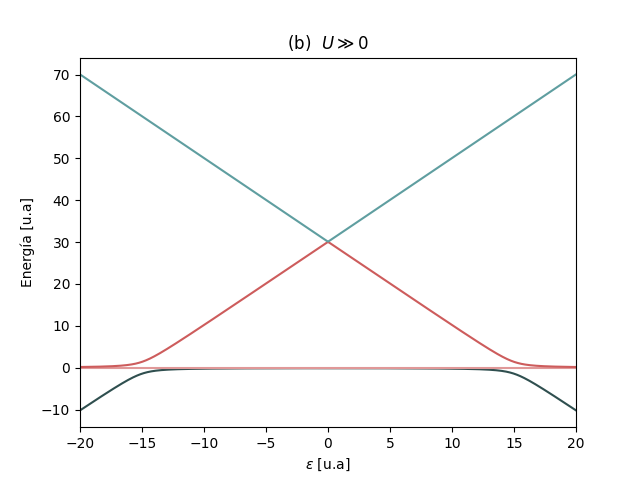

In [6]:
fig, ax = plt.subplots()

ax.plot(eps, autovalores)

ax.set_xlabel(r'$\epsilon$ [u.a]')
ax.set_ylabel('Energía [u.a]');
plt.xlim(min(eps),max(eps))
#plt.ylim(-50,50)
plt.title('(b)  'r'$U\gg0$')
plt.savefig('./figs/energy_2e2d_130.pdf')

In [7]:
eps_target =0
index = np.argmin(np.abs(eps - eps_target))

autoestados[index][:, 3]

array([-0.04682974,  0.04682974, -0.70555437, -0.70555437])